# Assignment 4: Correlation Analysis and Bootstrapping

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and bootstrapping, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation? 
5. How to estimate a population parameter based on a sample?
6. How to use the bootstrap to quantify the uncertainty of an estimated value?

**Requirements:**
* Use [pandas](https://pandas.pydata.org/) to manipulate data.
* Use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots.
* Please pay attention to visualization principles. 


The data can be downloaded from [A4-data.zip](A4-data.zip).


## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example, 

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent? 

To answer these questions, you need to conduct a correlation analysis. 

Imagine you are a data scientist working at a real-estate company. You download a property_tax_report from this [webpage](https://data.vancouver.ca/datacatalogue/propertyTax.htm). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2019.  You can find the schema information of the dataset from this [webpage](http://data.vancouver.ca/datacatalogue/propertyTaxAttributes.htm). 

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated. 

We first load the data as a DataFrame. 

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("property_tax_report_2019.csv")


df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE'] \
                                        +x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)

In [28]:
# This is for testing use 
# df = df[df['YEAR_BUILT']>=1900]
# df = df[df['LEGAL_TYPE']=='LAND']
# df['PROPERTY_POSTAL_CODE'].replace('', np.nan, inplace=True)
# df.dropna(subset=['PROPERTY_POSTAL_CODE'], inplace=True)
# df = df[(df['PROPERTY_POSTAL_CODE'].str.startswith('V6A'))]


### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose postcode starts with 'V6A'. Furthermore, we remove the houses that were built before 1900.

<img src="img/v6a.png", width=500/>

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

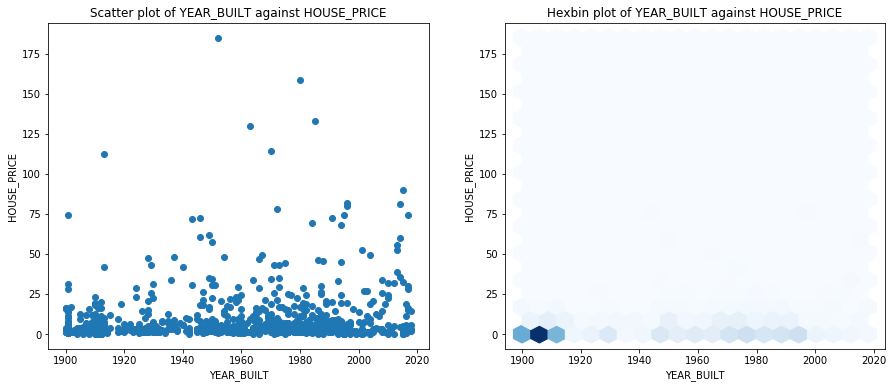

In [29]:
# filter the legal_type
df = df[df['LEGAL_TYPE']=='LAND']
# clean the empty spaces so that we can use str.startswith()
df['PROPERTY_POSTAL_CODE'].replace('', np.nan, inplace=True)
df.dropna(subset=['PROPERTY_POSTAL_CODE'], inplace=True)
# filter the postal code starts only with V6A
df = df[(df['PROPERTY_POSTAL_CODE'].str.startswith('V6A')) & (df['YEAR_BUILT']>=1900)]

# plot the graphs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
axes[0].scatter(x=df.YEAR_BUILT, y=df.HOUSE_PRICE)
axes[1].hexbin(x=df.YEAR_BUILT, y=df.HOUSE_PRICE, gridsize=20, cmap='Blues')
axes[0].set_xlabel('YEAR_BUILT')
axes[0].set_ylabel('HOUSE_PRICE')
axes[1].set_xlabel('YEAR_BUILT')
axes[1].set_ylabel('HOUSE_PRICE')
axes[0].set_title('Scatter plot of YEAR_BUILT against HOUSE_PRICE')
axes[1].set_title('Hexbin plot of YEAR_BUILT against HOUSE_PRICE')
plt.show()


Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. [The scatter plot shows that there is roughly a linear relationship between YEAR_BUILT and HOUSE_PRICE. Also the HOUSE_PRICE at this specific neighbourhood in vancouver is quite stable in the last 100 years]
2. [The Hexbin plot shows a similar trend but fail to present the outliers, and this is one of the shortage of hexbin plot compared with scatter plot]

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insights. One option is to bin one variable and plot percentiles of the other. 


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE. 
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`); 
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`); 
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


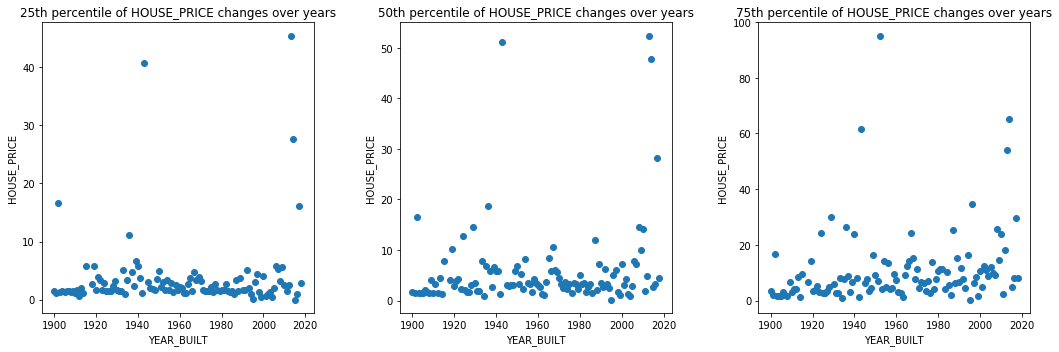

In [39]:
# add three subplots in one row 
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)    
ax1 = fig.add_subplot(132)
ax2 = fig.add_subplot(133)

# get the percentiles for each year 
df_25 = df.groupby('YEAR_BUILT').agg(lambda x: x.quantile(0.25)).reset_index()
df_50 = df.groupby('YEAR_BUILT').agg(lambda x: x.quantile(0.50)).reset_index()
df_75 = df.groupby('YEAR_BUILT').agg(lambda x: x.quantile(0.75)).reset_index()

# plot the graphs 
ax.scatter(x=df_25.YEAR_BUILT, y=df_25.HOUSE_PRICE)
ax.set_xlabel('YEAR_BUILT')
ax.set_ylabel('HOUSE_PRICE')
ax.set_title('25th percentile of HOUSE_PRICE changes over years')
ax1.scatter(x=df_50.YEAR_BUILT, y=df_50.HOUSE_PRICE)
ax1.set_xlabel('YEAR_BUILT')
ax1.set_ylabel('HOUSE_PRICE')
ax1.set_title('50th percentile of HOUSE_PRICE changes over years')
ax2.scatter(x=df_75.YEAR_BUILT, y=df_75.HOUSE_PRICE)
ax2.set_xlabel('YEAR_BUILT')
ax2.set_ylabel('HOUSE_PRICE')
ax2.set_title('75th percentile of HOUSE_PRICE changes over years')

# fix the overlap of titles
fig.tight_layout()
plt.show()



Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. [The three different perncentile plots have a similar distribution which means the data is quite robust.]
2. [The 75th percentile plots seems to have a positive relation while 25th percentile is quite stable even has a little bit negative trend. Thie is probably due to the price control policy to benefit the low income population.]

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables. 

In the following, please implement `calc_pearson()` and `calc_spearman()`, respectively. Note that you are *NOT* allowed to use [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) from Pandas or [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)/[spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) from scipy.stats to do this task. In other words, you need to implement the actual algorithms for pearson and spearman.

In [31]:
def calc_pearson(df, x, y):
# those three lines give the same covariances, just in different python expression 
#     cov_xy = (df[x]*df[y]).mean()-df[x].mean()*df[y].mean()
#     cov_xy = (((df[x]-df[x].mean())*(df[y]-df[y].mean())).sum())/len(df)
    cov_xy = ((df[x]-df[x].mean())*(df[y]-df[y].mean())).mean()
    return cov_xy/(df[x].std()*df[y].std())

def calc_spearman(df, x, y):
    # rank the data 
    df['rank_x'] = df[x].rank()
    df['rank_y'] = df[y].rank()
    # get the covariance for the ranks
    cov_rxy = (df['rank_x']*df['rank_y']).mean()-df['rank_x'].mean()*df['rank_y'].mean()
    # return the correlation
    return cov_rxy/(df['rank_x'].std()*df['rank_y'].std())


Then, you can use these two functions to compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>. 

In [32]:
# merge the three percentile tables 
dfcor = df_25.merge(df_50, on='YEAR_BUILT',how='left',suffixes=['_25','_50']).merge(df_75,on='YEAR_BUILT',how='inner').reset_index()
dfcor = dfcor[['YEAR_BUILT', 'HOUSE_PRICE_25', 'HOUSE_PRICE_50', 'HOUSE_PRICE']]
# rename the columns 
dfcor = dfcor.rename(columns={'HOUSE_PRICE_25':'25TH_HOUSE_PRICE', 'HOUSE_PRICE_50':'50TH_HOUSE_PRICE', 'HOUSE_PRICE':'75TH_HOUSE_PRICE'})
print(dfcor.head(10))
print()

# generate the correlation table
for TH in ["25TH", "50TH", "75TH"]:
    print(TH+"_HOUSE_PRICE\t pearson=%f\t spearman=%f"  \
          %(calc_pearson(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE"), \
            calc_spearman(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE")))

   YEAR_BUILT  25TH_HOUSE_PRICE  50TH_HOUSE_PRICE  75TH_HOUSE_PRICE
0      1900.0          1.550200           1.62600            3.5750
1      1901.0          1.189925           1.50700            2.0005
2      1902.0         16.614000          16.61400           16.6140
3      1903.0          1.246150           1.42620            1.5063
4      1904.0          1.454500           1.57920            1.6143
5      1905.0          1.378200           1.49100            1.6730
6      1906.0          1.452350           2.01700            3.1472
7      1907.0          1.448550           1.71800            2.0550
8      1908.0          1.321000           1.47480            1.6970
9      1909.0          1.500225           4.04085            6.8510

25TH_HOUSE_PRICE	 pearson=0.111637	 spearman=0.033324
50TH_HOUSE_PRICE	 pearson=0.184110	 spearman=0.184975
75TH_HOUSE_PRICE	 pearson=0.223495	 spearman=0.386178


<img src="correlation-result.png",align="left",width=500,height=500>

Please write down the **two** most interesting findings that you draw from the result.

**Findings**
1. [From the correlation table we can see that most of coefficients are pretty small, this is actually weired since from the scatter plot we can see a stable trend. This is because, imagine we have two data sets (0,0,0,0,0) and (3,4,5,6,7). if we plot the datasets we can also see a trend but the correlation is 0. Actually the variation of the non-zero data set doesn't affect zero dataset at all. Therefore when we consider about correlation we need to see the plot and coefficients together.]
2. [The 75TH_HOUSE_PRICE yields the highest correlation coeficient]

## Part 2. Bootstrapping

In reality, it is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., Vancouver's housing price has increased by 10% since last year), you should ALWAYS ask yourself: **"CAN I TRUST IT?"**. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question. 

In [34]:
df_sample = pd.read_csv("property_tax_report_2019_sample.csv")

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE'] \
                                             +x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE'] \
                                              +x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

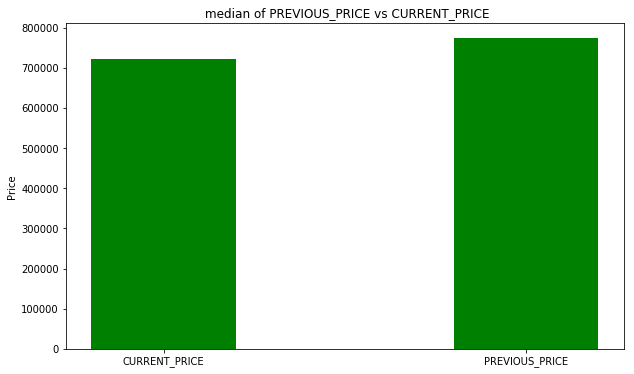

In [35]:
df_median = df_sample.median()
fig,ax = plt.subplots(figsize=(10,6))
x = ['CURRENT_PRICE', 'PREVIOUS_PRICE']
median = [df_median.CURRENT_PRICE, df_median.PREVIOUS_PRICE]
ax.bar(x, median, color='green',width=0.4, align='center')
ax.set_ylabel('Price')
ax.set_title(' median of PREVIOUS_PRICE vs CURRENT_PRICE')
plt.show()

In [36]:
# df_sample['CURRENT_PRICE'].isnull().sum()
df_sample['PREVIOUS_PRICE'].isnull().sum()

13

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.77 M, and the median of CURRENT_PRICE is about 0.72 M. Since the numbers were obtained from the sample, **"CAN WE TRUST THESE NUMBERS?"**

In the following, please implement the bootstrap by yourself, compute a 95%-confidence interval for each number, and add the confidence intervals to the above bar chart. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

In [37]:
def bootstrapping_median(df_sample,col_name, sample_median, sig_level):
    medians = []
    deltas = []
    
    # resampling for 1000 times 
    for i in range(1000):
        df_resample = df_sample.sample(n=len(df_sample), random_state=i, replace=True)
        medians.append(df_resample[col_name].median())
        
    # calculate the delta for new 1000 samples     
    for j in medians:
        deltas.append(j-sample_median)
    # convert the list to dataframe     
    df = pd.DataFrame(data=deltas)
    # get the quantiles
    delta_25 = int(df.sort_values(by=[0],ascending=True).quantile((1-sig_level)/2))
    delta_975 = int(df.sort_values(by=[0],ascending=True).quantile(1-((1-sig_level)/2)))
    
    # find the lower and upper bounds 
    lower_bound = df_median[col_name]-max(delta_25, delta_975)
    upper_bound = df_median[col_name]-min(delta_25, delta_975)
    
    # print the result 
    print('The',col_name,'estimated median with 95% confidence is: (',lower_bound,',',upper_bound,')' )


           

In [38]:
bootstrapping_median(df_sample, 'CURRENT_PRICE', df_median.CURRENT_PRICE, 0.95)
bootstrapping_median(df_sample, 'PREVIOUS_PRICE', df_median.PREVIOUS_PRICE, 0.95)



The CURRENT_PRICE estimated median with 95% confidence is: ( 690991.0 , 750000.0 )
The PREVIOUS_PRICE estimated median with 95% confidence is: ( 737988.0 , 807000.0 )


## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 4.